<a href="https://colab.research.google.com/github/shatmanyu/Customer-Segmentation/blob/main/Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Below is the code snippet to load files to colab from Local Machine!

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


Data Collection & Analysis

In [5]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_Customers.csv')

In [6]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [8]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0, 0.5, 'Count')

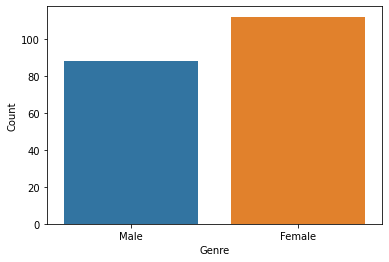

In [10]:
sns.countplot(x='Genre', data=customer_data)
plt.xlabel('Genre')
plt.ylabel('Count')

Choosing the Annual Income Column & Spending Score column

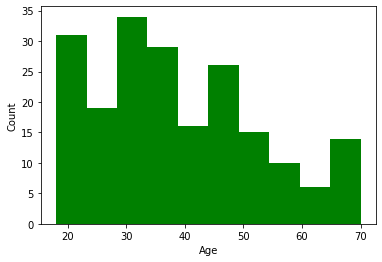

In [11]:
plt.hist(x=customer_data['Age'], bins=10, orientation='vertical', color='green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

From the Histogram it is evident that there are 3 age groups that are more frequently shop at the mall, they are: 15-22 years, 30-40 years and 45-50 years.

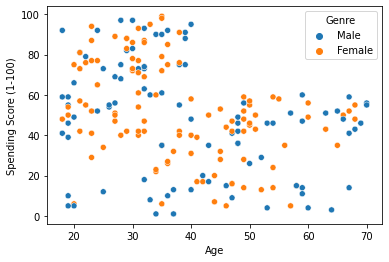

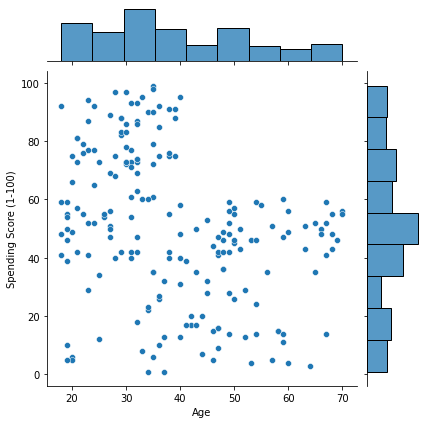

In [12]:
# Visualising the columns 'Age', 'Spending Score (1-100)' using Scatterplot and Jointplot
sns.scatterplot(data=customer_data, x='Age', y='Spending Score (1-100)', hue='Genre')
sns.jointplot(data=customer_data, x='Age', y='Spending Score (1-100)')

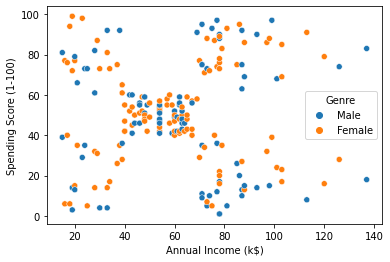

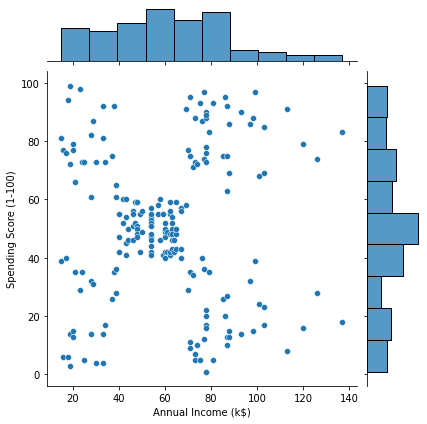

In [13]:
# Visualising the columns 'Annual Income (k$)', 'Spending Score (1-100)' using Scatterplot and Jointplot
sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre')
sns.jointplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)')

Annual Income Vs Spending Score - Observation

From the Annual Income Vs Spending Score plot we observe that there are 5 clusters and can be categorised as:
a. High Income, High Spending Score (Top Right Cluster)

b. High Income, Low Spending Score (Bottom Right Cluster)

c. Average Income, Average Spending Score (Center Cluster)

d. Low Income, High Spending Score (Top Left Cluster)

e. Low Income, Low Spending Score (Bottom Left Cluster)

In [14]:
X = customer_data.iloc[:,[3,4]].values

Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

1.   List item
2.   List item



In [15]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

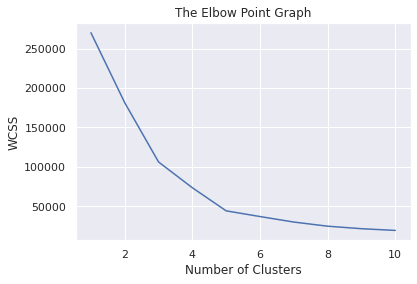

In [16]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters

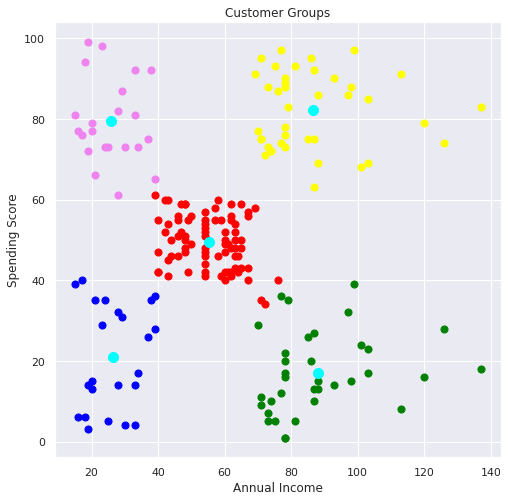

In [18]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()